# Installing and importing modules

In [ ]:
try:
  !pip install annoy
  print('Installed Annoy')
except:
  print('error')

     |████████████████████████████████| 655kB 7.6MB/s 
  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391631 sha256=695b45b2fdf12b4ddfbd7122fabcb31a7bf5e0397ca0e47318a38cce0d5d89a8
  Stored in directory: /root/.cache/pip/wheels/3a/c5/59/cce7e67b52c8e987389e53f917b6bb2a9d904a03246fadcb1e
Successfully built annoy
Installed Annoy


In [ ]:
from annoy import AnnoyIndex
from scipy import spatial

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import glob
import pickle
import re

from skimage.io import imread
from sklearn.metrics.pairwise import cosine_similarity
import scipy as sc

import io
import sys
import os
import time

# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/ADM/Cdiscount/fourteen_images_dict_pickle','rb') as f:
  images = pickle.load(f)

# Coverting image into an Annoy readable vector

In [ ]:
def load_img(path):

  img = path
  img = tf.image.resize_with_pad(img,224,224)
  img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis,...]
  return img

def get_image_feature_vectors():
  i = 0
  module_handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4"
  module = hub.load(module_handle)
  
  for pi_id,filename in images.items():
    i +=1
    #print("image count           :%s"%i)

    img = load_img(filename)
    features = module(img)
    #print(features)
    feature_set = np.squeeze(features)
    #print(feature_set)
    
    np.savez('/content/drive/MyDrive/ADM/Cdiscount/Fourteen_npz/'+str(pi_id)+'.npz',feature_set)

In [ ]:
get_image_feature_vectors()

# Loading the Annoy readable vector into the RAM

In [ ]:
file_paths_temp = glob.glob('/content/drive/MyDrive/ADM/Cdiscount/Fourteen_npz/*.npz')
file_paths_temp[:10]

['/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2186.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2187.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2196.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2197.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2200.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2201.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2202.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2206.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2204.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2210.npz']

In [ ]:
def sort_glob(file):
  file_path_dic ={}
  for f in file:
    file_path_dic[int(re.findall('[0-9]+',f)[0])] = f

  file_paths = []
  sorted_file_path = sorted(file_path_dic.items())

  for tup in sorted_file_path:
    file_paths.append(tup[1])
  
  return file_paths

In [ ]:
file_paths = sort_glob(file_paths_temp)
file_paths[:10]

['/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/2.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/5.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/11.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/13.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/14.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/17.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/21.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/22.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/23.npz',
 '/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/27.npz']

In [ ]:
start_time = time.time()

#file_index_to_file_name = {}
file_index_to_file_vector = {}
file_index_to_picture_id = {}

dims = 1792
n_nearest_neighbors = 20
trees = 1000

t = AnnoyIndex(dims,metric = 'angular')

for file_index, i in tqdm(enumerate(file_paths)):

  file_vector = np.load(i)

  #file_name = os.path.basename(i).split('.')[0]
  #file_index_to_file_name[file_index] = file_name
  file_index_to_file_vector[file_index] = file_vector
  file_index_to_picture_id[file_index] = int(re.findall('[0-9]+',i)[0])
  #print(file_vector['arr_0'].shape)

  t.add_item(file_index, file_vector['arr_0'])

end_time1 = (time.time() - start_time)

14554it [1:03:35,  3.81it/s]


In [ ]:
file_index_to_picture_id[6]

21

In [ ]:
print(end_time1)

3815.5385885238647


In [ ]:
start_time = time.time()
t.build(trees) 
end_time2 = time.time() - start_time

In [ ]:
print(end_time2)

31.37261152267456


In [ ]:
with open("/content/drive/MyDrive/ADM/Cdiscount/Annoy_file_vector",'ab') as f:
  pickle.dump(file_index_to_file_vector,f) 

In [ ]:
with open('/content/drive/MyDrive/ADM/Cdiscount/Annoy_picture_id','ab') as f:
  pickle.dump(file_index_to_picture_id,f)

In [ ]:
t.save('/content/drive/MyDrive/ADM/Cdiscount/annoy_index.ann')

True

In [ ]:
new_dim = 1792
u = AnnoyIndex(new_dim,metric='angular')
u.load('/content/drive/MyDrive/ADM/Cdiscount/annoy_index.ann')

True

In [ ]:
with open('/content/drive/MyDrive/ADM/Cdiscount/Annoy_picture_id','rb')as f:
  file_index_to_picture_id = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/ADM/Cdiscount/Annoy_file_vector','rb')as f:
  file_index_to_file_vector = pickle.load(f)

In [ ]:
test = file_paths[6]
test

'/content/drive/MyDrive/ADM/Cdiscount/Annoy/Fourteen_npz/21.npz'

In [ ]:
named_nearest_neighbors = []
n_nearest_neighbors = 20
#for i in file_index_to_file_name.keys():
#master_file_name = os.path.basename(test).split('.')[0]
master_vector = np.load(test)['arr_0']
master_picture_id = int(os.path.basename(test).split('.')[0])

nearest_neighbors = u.get_nns_by_vector(master_vector,n_nearest_neighbors)

for j in nearest_neighbors:
  #neighbor_file_name = file_index_to_file_name[j]
  neighbor_file_vector = file_index_to_file_vector[j]
  neighbor_picture_id = file_index_to_picture_id[j]

  similarity = 1-spatial.distance.cosine(master_vector, neighbor_file_vector)
  rounded_similarity = int((similarity * 10000))/10000.0

  named_nearest_neighbors.append({'similarity':rounded_similarity,
                                       'master_pi': master_picture_id,
                                       'similar_pi': neighbor_picture_id})
   

In [ ]:
picture_id_nns = [file_index_to_picture_id[fi] for fi in nearest_neighbors]

In [ ]:
named_nearest_neighbors

[{'master_pi': 21, 'similar_pi': 21, 'similarity': 1.0},
 {'master_pi': 21, 'similar_pi': 3397, 'similarity': 0.889},
 {'master_pi': 21, 'similar_pi': 22, 'similarity': 0.8654},
 {'master_pi': 21, 'similar_pi': 23, 'similarity': 0.8492},
 {'master_pi': 21, 'similar_pi': 28538, 'similarity': 0.8483},
 {'master_pi': 21, 'similar_pi': 858, 'similarity': 0.8402},
 {'master_pi': 21, 'similar_pi': 997, 'similarity': 0.8377},
 {'master_pi': 21, 'similar_pi': 27341, 'similarity': 0.8295},
 {'master_pi': 21, 'similar_pi': 30364, 'similarity': 0.8277},
 {'master_pi': 21, 'similar_pi': 3394, 'similarity': 0.8148},
 {'master_pi': 21, 'similar_pi': 29500, 'similarity': 0.8109},
 {'master_pi': 21, 'similar_pi': 26200, 'similarity': 0.8082},
 {'master_pi': 21, 'similar_pi': 13970, 'similarity': 0.8051},
 {'master_pi': 21, 'similar_pi': 28656, 'similarity': 0.8045},
 {'master_pi': 21, 'similar_pi': 26040, 'similarity': 0.8019},
 {'master_pi': 21, 'similar_pi': 595, 'similarity': 0.796},
 {'master_pi':

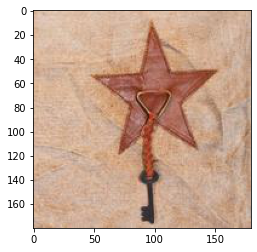

In [ ]:
plt.imshow(images[21])

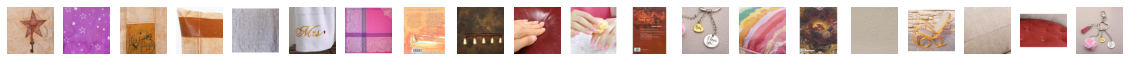

In [ ]:
f, ax = plt.subplots(1, len(picture_id_nns), figsize=(20, 10))
for i, p_id in enumerate(picture_id_nns):
  ax[i].imshow(images[p_id])
  ax[i].set_axis_off() 